La velocidad vertical en (-8,-5) es: -3.8606 m/s
La velocidad horizontal en (-8,-5) es: 6.3244 m/s
La presión estática en (-8,-5) es 99997.05 Pa


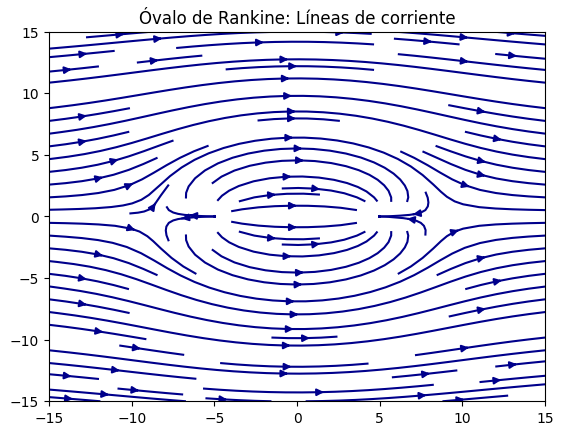

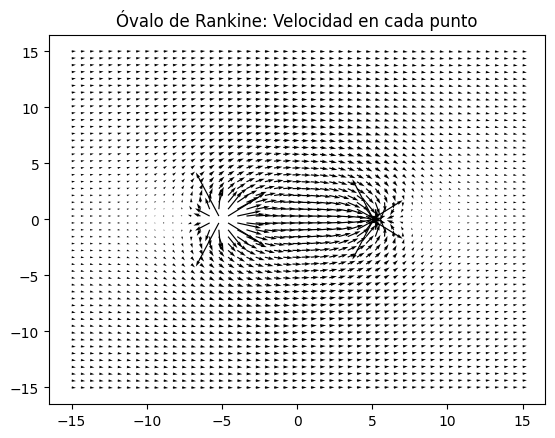

In [6]:
#OVALO DE RANKINE: Corriente incidente horizontal, un manantial de gasto Q en t=-a, y un sumidero de gasto -Q en t=a
#Cálculo derivando numéricamente el potencial complejo del flujo
import matplotlib.pyplot as plt
import cmath as c
import numpy as np

def prima(f,t,epsilon=10**(-5)):
    return (f(t+epsilon)-f(t))/(epsilon)

def uv(f,t):
    u=prima(f,t).real
    v=-prima(f,t).imag
    return u,v

def p(f,t,Uinf):
    u,v=uv(ovalo,t)
    modv2=u**2+v**2
    pinf=1e5
    densidad=1.0
    Pdin = pinf+0.5*densidad*(Uinf**2)
    p=Pdin-0.5*densidad*(modv2)
    return p

def velgrid(f):
    for i in range(len(x)):
        for j in range(len(y)):
            t=complex(x[i],y[j])
            u,v=uv(f,t)
            U[j,i]=u
            V[j,i]=v
    return X,Y,U,V

x=np.linspace(-15,15,50)
y=x
X,Y=np.meshgrid(x,y)
U,V=np.meshgrid(x,y)

Uinf=7
a=5
Q=200
tm=[-a,a]
def ovalo(t):
    f=(Q/(2*c.pi))*(1*c.log(t-tm[0])-1*c.log(t-tm[1]))
    return Uinf*t+f

#Pregunta 1: Velocidad vertical en el punto (-8,-5)?
t0=-8-5j
u,v=uv(ovalo,t0)
redon=4
print('La velocidad vertical en (-8,-5) es:',round(v,redon),'m/s')
#Pregunta 2: Velocidad horizontal en las coordenadas (-8, -5)
print('La velocidad horizontal en (-8,-5) es:',round(u,redon),'m/s')

#Pregunta 3: Calcule el valor de la presión estática en las coordenadas (-8, -5)
#Asuma un valor para la densidad de 1 kg/m3 y un valor de la presión de referencia de 1e5 Pa
redon=2
p0=p(ovalo,t0,Uinf)
print('La presión estática en (-8,-5) es',round(p0,redon),'Pa')

X,Y,U,V = velgrid(ovalo)
plt.title('Óvalo de Rankine: Líneas de corriente')
plt.streamplot(X,Y,U,V,color='darkblue')
plt.show()
plt.title('Óvalo de Rankine: Velocidad en cada punto')
plt.quiver(X,Y,U,V)
plt.show()

La velocidad vertical en (-8,-5) es: -3.8606 m/s
La velocidad horizontal en (-8,-5) es: 6.3244 m/s
La presión estática en (-8,-5) es 99997.05 Pa


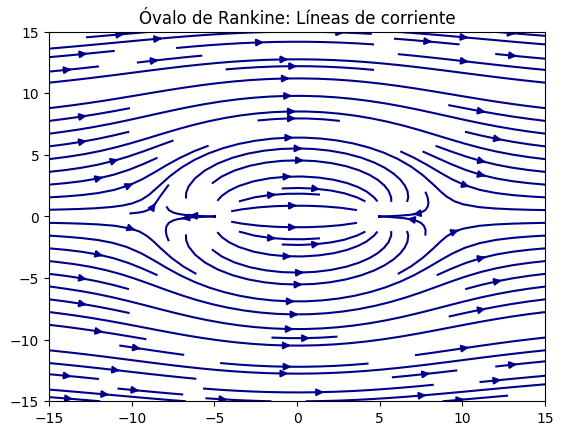

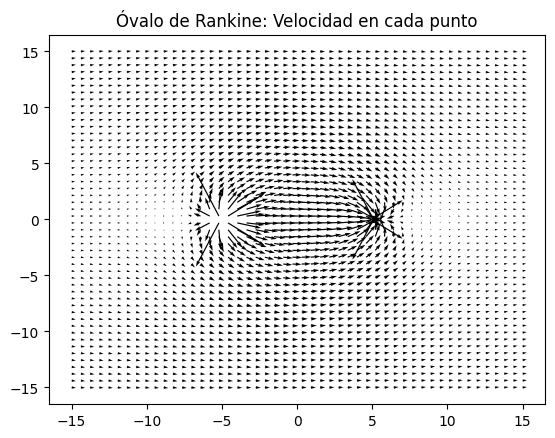

In [2]:
#OVALO DE RANKINE: Corriente incidente horizontal, un manantial de gasto Q en t=-a, y un sumidero de gasto -Q en t=a
#Calculo directamente con la función velocidad
import matplotlib.pyplot as plt
import cmath as c
import numpy as np

def p(f,t,Uinf):
    u,v=uvovalo(t)
    modv2=u**2+v**2
    pinf=1e5
    densidad=1.0
    Pdin = pinf+0.5*densidad*(Uinf**2)
    p=Pdin-0.5*densidad*(modv2)
    return p

def velgrid(f):
    for i in range(len(x)):
        for j in range(len(y)):
            t=complex(x[i],y[j])
            u,v=uvovalo(t)
            U[j,i]=u
            V[j,i]=v
    return X,Y,U,V

x=np.linspace(-15,15,50)
y=x
X,Y=np.meshgrid(x,y)
U,V=np.meshgrid(x,y)

Uinf=7
a=5
Q=200
tm=[-a,a]
def uvovalo(t):
    velc=Uinf+(Q/(2*c.pi))*((1/(t-tm[0]))-(1/(t-tm[1])))
    u=velc.real
    v=-velc.imag
    return u,v

#Pregunta 1: Velocidad vertical en el punto (-8,-5)?
t0=-8-5j
u,v=uvovalo(t0)
redon=4
print('La velocidad vertical en (-8,-5) es:',round(v,redon),'m/s')
#Pregunta 2: Velocidad horizontal en las coordenadas (-8, -5)
print('La velocidad horizontal en (-8,-5) es:',round(u,redon),'m/s')

#Pregunta 3: Calcule el valor de la presión estática en las coordenadas (-8, -5)
#Asuma un valor para la densidad de 1 kg/m3 y un valor de la presión de referencia de 1e5 Pa
redon=2
p0=p(uvovalo,t0,Uinf)
print('La presión estática en (-8,-5) es',round(p0,redon),'Pa')

X,Y,U,V = velgrid(uvovalo)
plt.title('Óvalo de Rankine: Líneas de corriente')
plt.streamplot(X,Y,U,V,color='darkblue')
plt.show()
plt.title('Óvalo de Rankine: Velocidad en cada punto')
plt.quiver(X,Y,U,V)
plt.show()